In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_excel('Sample - Superstore.xls')
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 21)

In [9]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [11]:
furniture=furniture[["Order Date","Sales"]]
furniture = furniture.sort_values('Order Date')


In [12]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [13]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.8200
7660,2014-01-07,76.7280
866,2014-01-10,51.9400
716,2014-01-11,9.9400
2978,2014-01-13,545.9400
4938,2014-01-13,333.9990
6474,2014-01-14,61.9600
970,2014-01-16,127.1040
5465,2014-01-19,181.4700
6327,2014-01-20,272.9400


In [14]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [15]:
furniture = furniture.set_index('Order Date')


In [16]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [17]:
y = furniture['Sales'].resample('MS').sum()


In [18]:
y.head()

Order Date
2014-01-01     6242.525
2014-02-01     1839.658
2014-03-01    14573.956
2014-04-01     7944.837
2014-05-01     6912.787
Freq: MS, Name: Sales, dtype: float64

In [19]:
y.shape

(48,)

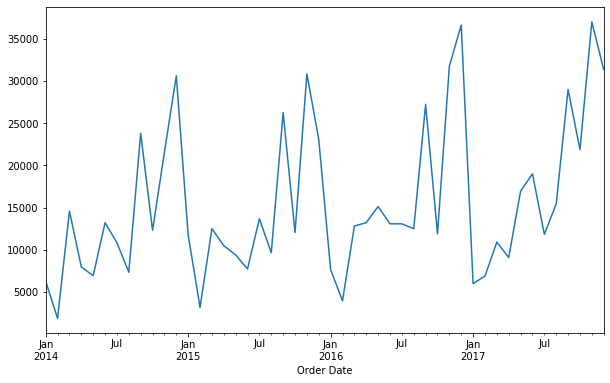

In [20]:
y.plot(figsize=(10, 6))
plt.show()

In [21]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print('ADF Statistic:',result[0])
print('p-value: %f' %result[1])


ADF Statistic: -4.699026242828902
p-value: 0.000085


In [22]:
"""f=y.diff( periods= 1)
f.plot(figsize=(10, 6))
plt.show()
"""

'f=y.diff( periods= 1)\nf.plot(figsize=(10, 6))\nplt.show()\n'

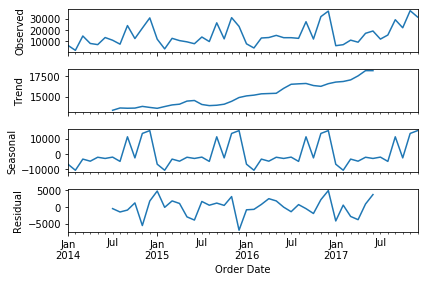

In [35]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [24]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX:',pdq[1],'x', seasonal_pdq[0])


SARIMAX: (0, 0, 1) x (0, 0, 0, 12)


In [25]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [26]:
#from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
            seasonal_order=param_seasonal)
            results = mod.fit()
            print('ARIMA',param,'x',param_seasonal,' - AIC:',results.aic)
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)  - AIC: 1078.25888197625


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA (0, 0, 0) x (0, 0, 1, 12)  - AIC: 1045.3573933812233
ARIMA (0, 0, 0) x (0, 1, 0, 12)  - AIC: 711.5292879261439
ARIMA (0, 0, 0) x (0, 2, 0, 12)  - AIC: 497.8250498333558


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA (0, 0, 0) x (1, 0, 0, 12)  - AIC: 982.2455258712331
ARIMA (0, 0, 0) x (1, 0, 1, 12)  - AIC: 982.850740903561
ARIMA (0, 0, 0) x (1, 1, 0, 12)  - AIC: 713.4200494282586
ARIMA (0, 0, 0) x (1, 2, 0, 12)  - AIC: 490.1871497788143
ARIMA (0, 0, 0) x (2, 0, 0, 12)  - AIC: 982.6177199783656
ARIMA (0, 0, 0) x (2, 0, 1, 12)  - AIC: 984.3886994081557
ARIMA (0, 0, 0) x (2, 1, 0, 12)  - AIC: 708.7100068262419
ARIMA (0, 0, 1) x (0, 0, 0, 12)  - AIC: 1059.367274937736
ARIMA (0, 0, 1) x (0, 0, 1, 12)  - AIC: 1053.0746436585878
ARIMA (0, 0, 1) x (0, 1, 0, 12)  - AIC: 712.7790106247764
ARIMA (0, 0, 1) x (0, 2, 0, 12)  - AIC: 499.43007675371143
ARIMA (0, 0, 1) x (1, 0, 0, 12)  - AIC: 1049.505112067567
ARIMA (0, 0, 1) x (1, 0, 1, 12)  - AIC: 980.7458429204471
ARIMA (0, 0, 1) x (1, 1, 0, 12)  - AIC: 714.3827137353879
ARIMA (0, 0, 1) x (1, 2, 0, 12)  - AIC: 488.4404209506092
ARIMA (0, 0, 1) x (2, 0, 0, 12)  - AIC: 1051.2751847064094
ARIMA (0, 0, 1) x (2, 0, 1, 12)  - AIC: 1053.2582912292346
ARIMA (0, 0

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (1, 0, 1, 12)  - AIC: 982.7783718571081
ARIMA (0, 0, 2) x (1, 1, 0, 12)  - AIC: 716.4370665861788
ARIMA (0, 0, 2) x (1, 2, 0, 12)  - AIC: 493.9373656163703
ARIMA (0, 0, 2) x (2, 0, 0, 12)  - AIC: 1054.12084826966
ARIMA (0, 0, 2) x (2, 0, 1, 12)  - AIC: 1056.1063166074186
ARIMA (0, 0, 2) x (2, 1, 0, 12)  - AIC: 713.9025584287727
ARIMA (0, 1, 0) x (0, 0, 0, 12)  - AIC: 1005.3736412641732
ARIMA (0, 1, 0) x (0, 0, 1, 12)  - AIC: 994.3391176363109
ARIMA (0, 1, 0) x (0, 1, 0, 12)  - AIC: 714.9974499615421
ARIMA (0, 1, 0) x (0, 2, 0, 12)  - AIC: 492.4441082574184
ARIMA (0, 1, 0) x (1, 0, 0, 12)  - AIC: 979.0640123312471


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)  - AIC: 980.2161971836701
ARIMA (0, 1, 0) x (1, 1, 0, 12)  - AIC: 713.494129984216
ARIMA (0, 1, 0) x (1, 2, 0, 12)  - AIC: 479.1881617315286
ARIMA (0, 1, 0) x (2, 0, 0, 12)  - AIC: 981.8451811920007


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (2, 0, 1, 12)  - AIC: 979.1951725505904
ARIMA (0, 1, 0) x (2, 1, 0, 12)  - AIC: 713.7596081782841
ARIMA (0, 1, 1) x (0, 0, 0, 12)  - AIC: 994.2446376692089
ARIMA (0, 1, 1) x (0, 0, 1, 12)  - AIC: 981.6348022717941
ARIMA (0, 1, 1) x (0, 1, 0, 12)  - AIC: 711.3983144344264
ARIMA (0, 1, 1) x (0, 2, 0, 12)  - AIC: 483.73048874654285
ARIMA (0, 1, 1) x (1, 0, 0, 12)  - AIC: 968.1204696018037
ARIMA (0, 1, 1) x (1, 0, 1, 12)  - AIC: 982.7105929343466
ARIMA (0, 1, 1) x (1, 1, 0, 12)  - AIC: 709.3634613045409
ARIMA (0, 1, 1) x (1, 2, 0, 12)  - AIC: 468.7377127462507
ARIMA (0, 1, 1) x (2, 0, 0, 12)  - AIC: 964.6630538344231
ARIMA (0, 1, 1) x (2, 0, 1, 12)  - AIC: 984.171452559862
ARIMA (0, 1, 1) x (2, 1, 0, 12)  - AIC: 709.1624931868272
ARIMA (0, 1, 2) x (0, 0, 0, 12)  - AIC: 994.8502225261551
ARIMA (0, 1, 2) x (0, 0, 1, 12)  - AIC: 981.7140548150894
ARIMA (0, 1, 2) x (0, 1, 0, 12)  - AIC: 712.2228795169575
ARIMA (0, 1, 2) x (0, 2, 0, 12)  - AIC: 484.60534435780517
ARIMA (0, 1, 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (2, 0, 1, 12)  - AIC: 966.9067800880355
ARIMA (0, 1, 2) x (2, 1, 0, 12)  - AIC: 709.9370469103151
ARIMA (0, 2, 0) x (0, 0, 0, 12)  - AIC: 1032.1247708705994
ARIMA (0, 2, 0) x (0, 0, 1, 12)  - AIC: 1018.9440539866871
ARIMA (0, 2, 0) x (0, 1, 0, 12)  - AIC: 730.6784029892915
ARIMA (0, 2, 0) x (0, 2, 0, 12)  - AIC: 491.93490653857845
ARIMA (0, 2, 0) x (1, 0, 0, 12)  - AIC: 1005.6141402722919
ARIMA (0, 2, 0) x (1, 0, 1, 12)  - AIC: 1030.1416584874014
ARIMA (0, 2, 0) x (1, 1, 0, 12)  - AIC: 730.241636374332
ARIMA (0, 2, 0) x (1, 2, 0, 12)  - AIC: 493.034538605825
ARIMA (0, 2, 0) x (2, 0, 0, 12)  - AIC: 1004.7574813483711
ARIMA (0, 2, 0) x (2, 0, 1, 12)  - AIC: 1011.9074008796422
ARIMA (0, 2, 0) x (2, 1, 0, 12)  - AIC: 736.8004795639392
ARIMA (0, 2, 1) x (0, 0, 0, 12)  - AIC: 989.5419166768011


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA (0, 2, 1) x (0, 0, 1, 12)  - AIC: 976.8978036908396
ARIMA (0, 2, 1) x (0, 1, 0, 12)  - AIC: 699.0422182305908
ARIMA (0, 2, 1) x (0, 2, 0, 12)  - AIC: 474.66004974686376
ARIMA (0, 2, 1) x (1, 0, 0, 12)  - AIC: 962.3072601243791
ARIMA (0, 2, 1) x (1, 0, 1, 12)  - AIC: 962.7372716758447
ARIMA (0, 2, 1) x (1, 1, 0, 12)  - AIC: 697.3200822982375
ARIMA (0, 2, 1) x (1, 2, 0, 12)  - AIC: 468.51319705445263
ARIMA (0, 2, 1) x (2, 0, 0, 12)  - AIC: 960.8798311993366
ARIMA (0, 2, 1) x (2, 0, 1, 12)  - AIC: 983.9425058811291
ARIMA (0, 2, 1) x (2, 1, 0, 12)  - AIC: 699.3476231063893
ARIMA (0, 2, 2) x (0, 0, 0, 12)  - AIC: 983.9203676807817
ARIMA (0, 2, 2) x (0, 0, 1, 12)  - AIC: 966.3984738507595
ARIMA (0, 2, 2) x (0, 1, 0, 12)  - AIC: 692.5276503519971
ARIMA (0, 2, 2) x (0, 2, 0, 12)  - AIC: 476.24126106924007
ARIMA (0, 2, 2) x (1, 0, 0, 12)  - AIC: 976.2699097813257


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (1, 0, 1, 12)  - AIC: 955.8801989785019
ARIMA (0, 2, 2) x (1, 1, 0, 12)  - AIC: 690.3352934872238
ARIMA (0, 2, 2) x (1, 2, 0, 12)  - AIC: 456.41051246119866


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 0, 0, 12)  - AIC: 954.8068077862364
ARIMA (0, 2, 2) x (2, 0, 1, 12)  - AIC: 979.8486579707658
ARIMA (0, 2, 2) x (2, 1, 0, 12)  - AIC: 690.823977127396
ARIMA (1, 0, 0) x (0, 0, 0, 12)  - AIC: 1026.1291342527686
ARIMA (1, 0, 0) x (0, 0, 1, 12)  - AIC: 1013.4893645800755
ARIMA (1, 0, 0) x (0, 1, 0, 12)  - AIC: 712.5992604202136
ARIMA (1, 0, 0) x (0, 2, 0, 12)  - AIC: 499.36538114532993
ARIMA (1, 0, 0) x (1, 0, 0, 12)  - AIC: 979.53454694344
ARIMA (1, 0, 0) x (1, 0, 1, 12)  - AIC: 978.1377133797821
ARIMA (1, 0, 0) x (1, 1, 0, 12)  - AIC: 714.0923601681995
ARIMA (1, 0, 0) x (1, 2, 0, 12)  - AIC: 491.026889463299
ARIMA (1, 0, 0) x (2, 0, 0, 12)  - AIC: 1007.1934000819326
ARIMA (1, 0, 0) x (2, 0, 1, 12)  - AIC: 1009.1904027184563
ARIMA (1, 0, 0) x (2, 1, 0, 12)  - AIC: 710.8560188488758
ARIMA (1, 0, 1) x (0, 0, 0, 12)  - AIC: 1018.3471684815405


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA (1, 0, 1) x (0, 0, 1, 12)  - AIC: 1006.4656559928344
ARIMA (1, 0, 1) x (0, 1, 0, 12)  - AIC: 711.12073145183
ARIMA (1, 0, 1) x (0, 2, 0, 12)  - AIC: 501.152321278051


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12)  - AIC: 969.9726235587264


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)  - AIC: 968.0881252837645


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 1, 0, 12)  - AIC: 708.8861641862068
ARIMA (1, 0, 1) x (1, 2, 0, 12)  - AIC: 488.99616342844206


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 0, 12)  - AIC: 967.7690555362943
ARIMA (1, 0, 1) x (2, 0, 1, 12)  - AIC: 991.5522999582754
ARIMA (1, 0, 1) x (2, 1, 0, 12)  - AIC: 711.5056305492141
ARIMA (1, 0, 2) x (0, 0, 0, 12)  - AIC: 1019.1717695877003


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (0, 0, 1, 12)  - AIC: 996.9754931432788
ARIMA (1, 0, 2) x (0, 1, 0, 12)  - AIC: 716.848902286411
ARIMA (1, 0, 2) x (0, 2, 0, 12)  - AIC: 502.4662768053918
ARIMA (1, 0, 2) x (1, 0, 0, 12)  - AIC: 986.0448315070892


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 0, 1, 12)  - AIC: 970.0793246716587
ARIMA (1, 0, 2) x (1, 1, 0, 12)  - AIC: 718.3884461712998


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 2, 0, 12)  - AIC: 491.7292406593383


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 0, 12)  - AIC: 969.4045218900137


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 1, 12)  - AIC: 1007.3433010810628
ARIMA (1, 0, 2) x (2, 1, 0, 12)  - AIC: 715.3465921011962
ARIMA (1, 1, 0) x (0, 0, 0, 12)  - AIC: 999.1166037056389
ARIMA (1, 1, 0) x (0, 0, 1, 12)  - AIC: 990.1359335884968
ARIMA (1, 1, 0) x (0, 1, 0, 12)  - AIC: 713.1807806099162
ARIMA (1, 1, 0) x (0, 2, 0, 12)  - AIC: 492.94482781839946
ARIMA (1, 1, 0) x (1, 0, 0, 12)  - AIC: 974.7378628151669
ARIMA (1, 1, 0) x (1, 0, 1, 12)  - AIC: 986.0083929431554
ARIMA (1, 1, 0) x (1, 1, 0, 12)  - AIC: 711.1441203937902
ARIMA (1, 1, 0) x (1, 2, 0, 12)  - AIC: 480.7679710286655
ARIMA (1, 1, 0) x (2, 0, 0, 12)  - AIC: 974.0166989372657
ARIMA (1, 1, 0) x (2, 0, 1, 12)  - AIC: 987.3370862733162
ARIMA (1, 1, 0) x (2, 1, 0, 12)  - AIC: 711.2665291418252
ARIMA (1, 1, 1) x (0, 0, 0, 12)  - AIC: 994.744779890555
ARIMA (1, 1, 1) x (0, 0, 1, 12)  - AIC: 987.2777365855328
ARIMA (1, 1, 1) x (0, 1, 0, 12)  - AIC: 710.7930830536797
ARIMA (1, 1, 1) x (0, 2, 0, 12)  - AIC: 484.60173668853037
ARIMA (1, 1,

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (2, 0, 1, 12)  - AIC: 972.8104313309503
ARIMA (1, 1, 1) x (2, 1, 0, 12)  - AIC: 708.9846472774417
ARIMA (1, 1, 2) x (0, 0, 0, 12)  - AIC: 996.508469235073
ARIMA (1, 1, 2) x (0, 0, 1, 12)  - AIC: 988.9127946685834
ARIMA (1, 1, 2) x (0, 1, 0, 12)  - AIC: 713.0218456618558
ARIMA (1, 1, 2) x (0, 2, 0, 12)  - AIC: 486.6771809365164
ARIMA (1, 1, 2) x (1, 0, 0, 12)  - AIC: 972.3977868867331
ARIMA (1, 1, 2) x (1, 0, 1, 12)  - AIC: 985.6079243538517
ARIMA (1, 1, 2) x (1, 1, 0, 12)  - AIC: 710.5154914867725
ARIMA (1, 1, 2) x (1, 2, 0, 12)  - AIC: 472.7377457360566
ARIMA (1, 1, 2) x (2, 0, 0, 12)  - AIC: 969.3715113531794


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (2, 0, 1, 12)  - AIC: 980.8213699950585
ARIMA (1, 1, 2) x (2, 1, 0, 12)  - AIC: 710.72241986703
ARIMA (1, 2, 0) x (0, 0, 0, 12)  - AIC: 1012.9597085181143
ARIMA (1, 2, 0) x (0, 0, 1, 12)  - AIC: 1003.6545551187131
ARIMA (1, 2, 0) x (0, 1, 0, 12)  - AIC: 716.8567528573014
ARIMA (1, 2, 0) x (0, 2, 0, 12)  - AIC: 483.54076733719745
ARIMA (1, 2, 0) x (1, 0, 0, 12)  - AIC: 996.8249898608367
ARIMA (1, 2, 0) x (1, 0, 1, 12)  - AIC: 998.2655978036026
ARIMA (1, 2, 0) x (1, 1, 0, 12)  - AIC: 715.6089894970382
ARIMA (1, 2, 0) x (1, 2, 0, 12)  - AIC: 472.987208264968
ARIMA (1, 2, 0) x (2, 0, 0, 12)  - AIC: 982.9303384344552
ARIMA (1, 2, 0) x (2, 0, 1, 12)  - AIC: 999.8994281950797
ARIMA (1, 2, 0) x (2, 1, 0, 12)  - AIC: 716.4975643377259
ARIMA (1, 2, 1) x (0, 0, 0, 12)  - AIC: 983.4961032569665
ARIMA (1, 2, 1) x (0, 0, 1, 12)  - AIC: 970.9945271591847
ARIMA (1, 2, 1) x (0, 1, 0, 12)  - AIC: 694.3623256313169
ARIMA (1, 2, 1) x (0, 2, 0, 12)  - AIC: 473.5554450456527
ARIMA (1, 2, 1

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (0, 0, 1, 12)  - AIC: 966.4825616626338
ARIMA (1, 2, 2) x (0, 1, 0, 12)  - AIC: 694.5276990275847
ARIMA (1, 2, 2) x (0, 2, 0, 12)  - AIC: 476.7578089668702
ARIMA (1, 2, 2) x (1, 0, 0, 12)  - AIC: 964.5477903112425


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (1, 0, 1, 12)  - AIC: 957.0498414296287
ARIMA (1, 2, 2) x (1, 1, 0, 12)  - AIC: 696.3624799388803


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (1, 2, 0, 12)  - AIC: 460.43095979443626
ARIMA (1, 2, 2) x (2, 0, 0, 12)  - AIC: 979.0897676697438
ARIMA (1, 2, 2) x (2, 0, 1, 12)  - AIC: 980.8825561397218
ARIMA (1, 2, 2) x (2, 1, 0, 12)  - AIC: 697.5081129854158
ARIMA (2, 0, 0) x (0, 0, 0, 12)  - AIC: 1022.6194463277445
ARIMA (2, 0, 0) x (0, 0, 1, 12)  - AIC: 1010.9239988200052
ARIMA (2, 0, 0) x (0, 1, 0, 12)  - AIC: 714.5665834215898
ARIMA (2, 0, 0) x (0, 2, 0, 12)  - AIC: 501.23776659221915
ARIMA (2, 0, 0) x (1, 0, 0, 12)  - AIC: 979.0895437342241


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (1, 0, 1, 12)  - AIC: 977.254352334594
ARIMA (2, 0, 0) x (1, 1, 0, 12)  - AIC: 715.975602411865
ARIMA (2, 0, 0) x (1, 2, 0, 12)  - AIC: 493.07998001951375
ARIMA (2, 0, 0) x (2, 0, 0, 12)  - AIC: 977.0384634667196


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (2, 0, 1, 12)  - AIC: 980.6100678878736
ARIMA (2, 0, 0) x (2, 1, 0, 12)  - AIC: 712.9258249332377
ARIMA (2, 0, 1) x (0, 0, 0, 12)  - AIC: 1018.040387153305


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (0, 0, 1, 12)  - AIC: 996.8134822702591


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (0, 1, 0, 12)  - AIC: 713.5116179528112
ARIMA (2, 0, 1) x (0, 2, 0, 12)  - AIC: 502.6138722411996


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (1, 0, 0, 12)  - AIC: 986.3689851309932
ARIMA (2, 0, 1) x (1, 0, 1, 12)  - AIC: 992.6891701002093


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (1, 1, 0, 12)  - AIC: 710.9342440943686
ARIMA (2, 0, 1) x (1, 2, 0, 12)  - AIC: 495.1300011961217


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 0, 12)  - AIC: 972.5064910387204


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)  - AIC: 999.0893472146668
ARIMA (2, 0, 1) x (2, 1, 0, 12)  - AIC: 714.7188209794263
ARIMA (2, 0, 2) x (0, 0, 0, 12)  - AIC: 1020.706082837359
ARIMA (2, 0, 2) x (0, 0, 1, 12)  - AIC: 1010.7645502281152
ARIMA (2, 0, 2) x (0, 1, 0, 12)  - AIC: 718.8453743049112
ARIMA (2, 0, 2) x (0, 2, 0, 12)  - AIC: 502.29091000274775


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 0, 0, 12)  - AIC: 975.3643845100119


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 0, 1, 12)  - AIC: 991.7357718224114


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 1, 0, 12)  - AIC: 715.0115133905358


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 2, 0, 12)  - AIC: 493.11182692666637


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 1, 12)  - AIC: 1008.9294506814275
ARIMA (2, 0, 2) x (2, 1, 0, 12)  - AIC: 717.3187936709493
ARIMA (2, 1, 0) x (0, 0, 0, 12)  - AIC: 996.3001515631211
ARIMA (2, 1, 0) x (0, 0, 1, 12)  - AIC: 987.1934312150734
ARIMA (2, 1, 0) x (0, 1, 0, 12)  - AIC: 715.3780616351956
ARIMA (2, 1, 0) x (0, 2, 0, 12)  - AIC: 494.20694466093
ARIMA (2, 1, 0) x (1, 0, 0, 12)  - AIC: 972.9686577183115
ARIMA (2, 1, 0) x (1, 0, 1, 12)  - AIC: 983.071458633432
ARIMA (2, 1, 0) x (1, 1, 0, 12)  - AIC: 712.3983539695885
ARIMA (2, 1, 0) x (1, 2, 0, 12)  - AIC: 480.87875123012793
ARIMA (2, 1, 0) x (2, 0, 0, 12)  - AIC: 982.7111557112491
ARIMA (2, 1, 0) x (2, 0, 1, 12)  - AIC: 984.1053144097209
ARIMA (2, 1, 0) x (2, 1, 0, 12)  - AIC: 712.427075750988
ARIMA (2, 1, 1) x (0, 0, 0, 12)  - AIC: 998.31303058294
ARIMA (2, 1, 1) x (0, 0, 1, 12)  - AIC: 989.8163333860149
ARIMA (2, 1, 1) x (0, 1, 0, 12)  - AIC: 712.5526169602571
ARIMA (2, 1, 1) x (0, 2, 0, 12)  - AIC: 486.58470827563895
ARIMA (2, 1, 1) x

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 0, 1, 12)  - AIC: 974.833778641529
ARIMA (2, 1, 1) x (2, 1, 0, 12)  - AIC: 710.694053685278
ARIMA (2, 1, 2) x (0, 0, 0, 12)  - AIC: 997.277223311669
ARIMA (2, 1, 2) x (0, 0, 1, 12)  - AIC: 990.6946842578074
ARIMA (2, 1, 2) x (0, 1, 0, 12)  - AIC: 714.9369085429171
ARIMA (2, 1, 2) x (0, 2, 0, 12)  - AIC: 488.2094575336405


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 0, 0, 12)  - AIC: 976.0150886680418
ARIMA (2, 1, 2) x (1, 0, 1, 12)  - AIC: 987.2538016155958
ARIMA (2, 1, 2) x (1, 1, 0, 12)  - AIC: 711.9310277259694
ARIMA (2, 1, 2) x (1, 2, 0, 12)  - AIC: 474.0062160224845


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 0, 0, 12)  - AIC: 970.4162499182905


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 0, 1, 12)  - AIC: 975.4532515995967
ARIMA (2, 1, 2) x (2, 1, 0, 12)  - AIC: 710.8214928745565
ARIMA (2, 2, 0) x (0, 0, 0, 12)  - AIC: 995.9410841743124
ARIMA (2, 2, 0) x (0, 0, 1, 12)  - AIC: 987.0116071264538
ARIMA (2, 2, 0) x (0, 1, 0, 12)  - AIC: 711.8024299912165
ARIMA (2, 2, 0) x (0, 2, 0, 12)  - AIC: 481.69866985628113
ARIMA (2, 2, 0) x (1, 0, 0, 12)  - AIC: 981.0483035271841
ARIMA (2, 2, 0) x (1, 0, 1, 12)  - AIC: 982.5941350810882
ARIMA (2, 2, 0) x (1, 1, 0, 12)  - AIC: 710.0466742717316
ARIMA (2, 2, 0) x (1, 2, 0, 12)  - AIC: 471.3285347183128
ARIMA (2, 2, 0) x (2, 0, 0, 12)  - AIC: 982.3000631733672
ARIMA (2, 2, 0) x (2, 0, 1, 12)  - AIC: 983.9190836375062
ARIMA (2, 2, 0) x (2, 1, 0, 12)  - AIC: 711.18806345465
ARIMA (2, 2, 1) x (0, 0, 0, 12)  - AIC: 983.9651557317022


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (0, 0, 1, 12)  - AIC: 968.5208759806349
ARIMA (2, 2, 1) x (0, 1, 0, 12)  - AIC: 695.9758736107738
ARIMA (2, 2, 1) x (0, 2, 0, 12)  - AIC: 475.43852261079604
ARIMA (2, 2, 1) x (1, 0, 0, 12)  - AIC: 956.3395263734784


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (1, 0, 1, 12)  - AIC: 957.6458555783154
ARIMA (2, 2, 1) x (1, 1, 0, 12)  - AIC: 694.8621053833054
ARIMA (2, 2, 1) x (1, 2, 0, 12)  - AIC: 458.4126743035242
ARIMA (2, 2, 1) x (2, 0, 0, 12)  - AIC: 956.5981040299794
ARIMA (2, 2, 1) x (2, 0, 1, 12)  - AIC: 978.435257101408
ARIMA (2, 2, 1) x (2, 1, 0, 12)  - AIC: 695.6670902417617
ARIMA (2, 2, 2) x (0, 0, 0, 12)  - AIC: 984.8312848393256


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (0, 0, 1, 12)  - AIC: 968.4141894407376
ARIMA (2, 2, 2) x (0, 1, 0, 12)  - AIC: 697.5732454926762
ARIMA (2, 2, 2) x (0, 2, 0, 12)  - AIC: 478.1593087294559
ARIMA (2, 2, 2) x (1, 0, 0, 12)  - AIC: 974.7846634684489
ARIMA (2, 2, 2) x (1, 0, 1, 12)  - AIC: 976.6087297566822
ARIMA (2, 2, 2) x (1, 1, 0, 12)  - AIC: 696.106378630499


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 2, 0, 12)  - AIC: 459.9625730630823
ARIMA (2, 2, 2) x (2, 0, 0, 12)  - AIC: 976.4879259542083
ARIMA (2, 2, 2) x (2, 0, 1, 12)  - AIC: 978.1607859189734
ARIMA (2, 2, 2) x (2, 1, 0, 12)  - AIC: 695.3523183663601


E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0,0,0),
                                seasonal_order=(1, 2, 0, 12))
results = mod.fit()
results.aic

490.1871497788143

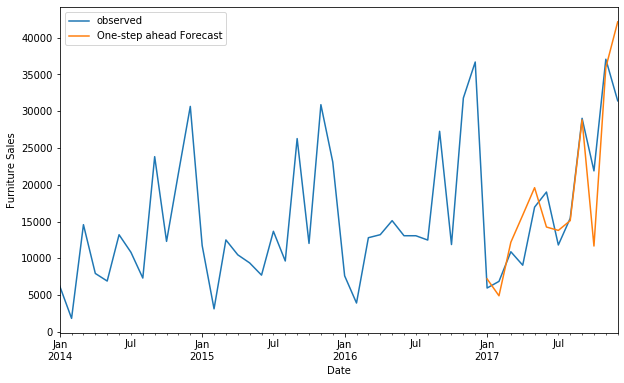

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [29]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


5063.380497937717


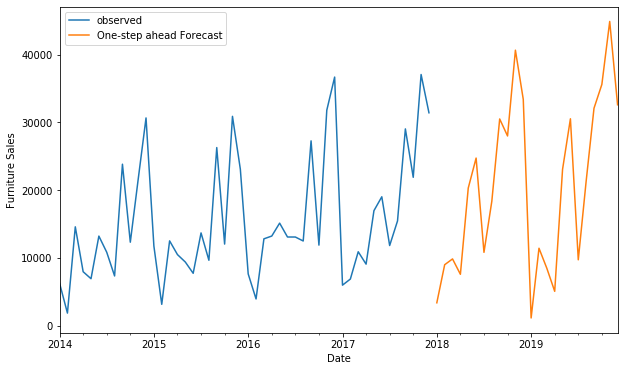

In [30]:
pred_uc = results.get_forecast(steps=24)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [31]:
pred_uc.predicted_mean

2018-01-01     3359.577555
2018-02-01     8980.201183
2018-03-01     9835.550044
2018-04-01     7567.430114
2018-05-01    20298.307972
2018-06-01    24722.860223
2018-07-01    10807.414875
2018-08-01    18356.660988
2018-09-01    30495.220455
2018-10-01    27985.028939
2018-11-01    40648.615976
2018-12-01    33392.972930
2019-01-01     1118.936482
2019-02-01    11412.169741
2019-03-01     8450.768220
2019-04-01     5050.408462
2019-05-01    23060.865879
2019-06-01    30523.203633
2019-07-01     9705.678849
2019-08-01    21288.318228
2019-09-01    32076.990558
2019-10-01    35590.312316
2019-11-01    44887.243788
2019-12-01    32586.914100
Freq: MS, dtype: float64

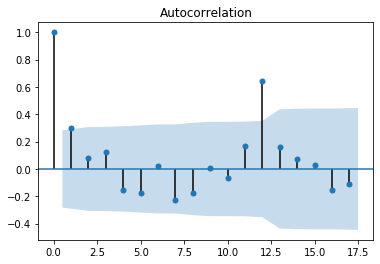

In [32]:
import statsmodels
a=statsmodels.graphics.tsaplots.plot_acf(y)


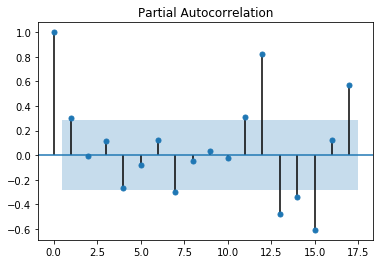

In [33]:
b=statsmodels.graphics.tsaplots.plot_pacf( y)

In [37]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX:',pdq[1],'x', seasonal_pdq[0])


SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
